<a href="https://colab.research.google.com/github/Mallika225-28/CODSOFT-Projects/blob/main/Task3_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*TASK-3: IRIS FLOWER CLASSIFICATION*

* Author : Mallika Santra
* Batch : MAY BATCH B28
* Domain : Data Science
* Aims : To develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements.

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Import the Dataset

In [ ]:
 # loading the csv data to a Pandas DataFrame
df = pd.read_csv("/content/IRIS.csv")

In [ ]:
# print first 5 rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#print last 5 rows of the dataset
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# number of rows and columns in the dataset
df.shape

(150, 5)

In [ ]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3},inplace=True)

<ipython-input-221-3691001035>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3},inplace=True)
<ipython-input-221-3691001035>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'].replace({'Iris-setosa':1,'Iris-ve

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


Scatter Plot

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

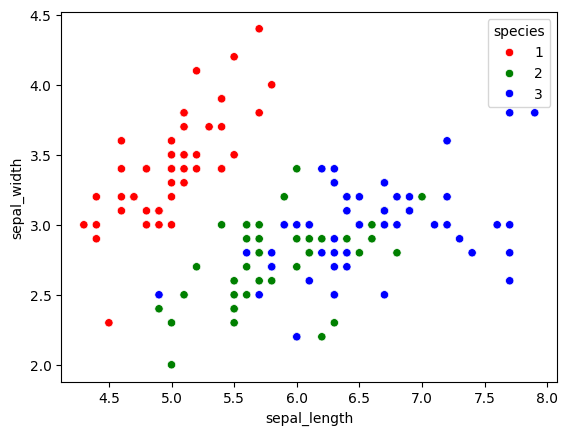

In [ ]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=df,palette=['red','green','blue'])

Corelation Matrix

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

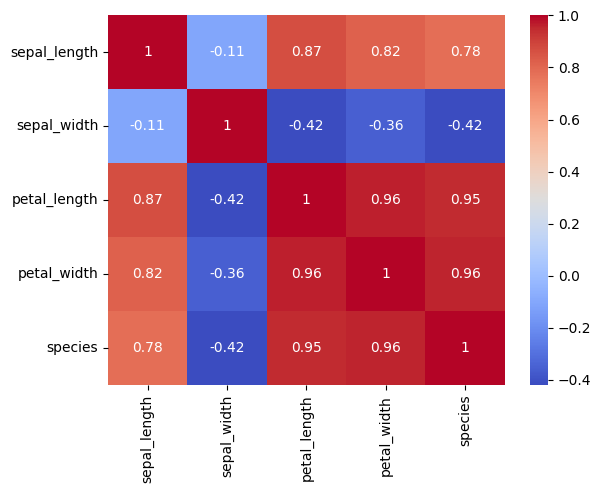

In [ ]:
corr= df.corr()
sns.heatmap(corr,annot = True, cmap='coolwarm')

In [ ]:
# checking for missing values
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
# checking the distribution of Target Variable
df['species'].value_counts()

,count
species,
1,50
2,50
3,50


1 --> Iris-setosa

2 --> Iris-versicolor

3 --> Iris-virginica

Splitting the Features and Target

In [ ]:
X = df.drop(columns='species', axis=1)
Y = df['species']

In [ ]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9666666666666667


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  1.0


In [ ]:
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [ ]:
input_data = (7,3.2,4.7,1.4	) #6.5,3.0,5.2,2.0 - Iris-virginica 	#7,3.2,4.7,1.4 - Iris-versicolor

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 1):
  print('Iris-setosa')
elif (prediction[0]== 2):
  print('Iris-versicolor')
else:
  print('Iris-virginica')

[2]
Iris-versicolor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
